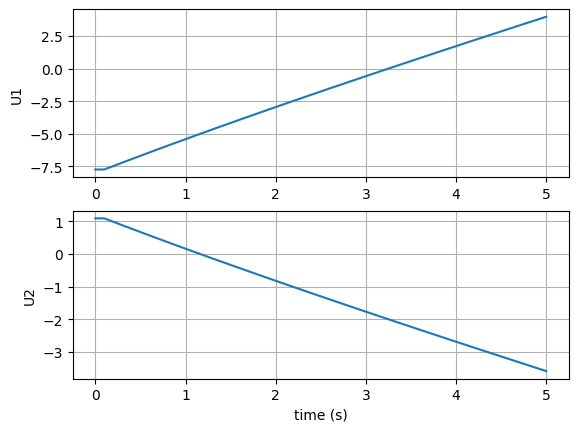

In [5]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

def dae_eqs(U, *args):

    # U denotes vector of variables at time t + time_step. U(0) means U1, U(1) is U2 and so on.

    # *args contains Ut and time_step
        # Ut denotes vector of variables at time t.
        # value of time step is necessary for calculating discretized derivatives.

    # Unpack arguments
    Ut, time_step = args
    # set some arbitray values of parameters
    c1 = 1.0
    c2 = 2.0
    c3 = 3.0
    c4 = 4.0
    R2 = 2.0
    R3 = 3.0
    R4 = 4.0
    B1 = 1.0
    B2 = 2.0
    E = 5.0

    # Let's assign values of U array to U1, U2, ... for ease.
    U1 = U[0]
    U2 = U[1]
    U3 = U[2]
    U4 = U[3]
    U5 = U[4]
    U6 = U[5]
    U7 = U[6]
    U8 = U[7]
    # The same for array Ut.
    Ut1 = Ut[0]
    Ut2 = Ut[1]
    Ut3 = Ut[2]
    Ut4 = Ut[3]
    Ut5 = Ut[4]
    Ut6 = Ut[5]
    Ut7 = Ut[6]
    Ut8 = Ut[7]

    # Derivatives of U valuses. Some of them are not used, but let's leave them for consistency.
    U1_deriv = (U1-Ut1)/time_step
    U2_deriv = (U2-Ut2)/time_step
    U3_deriv = (U3-Ut3)/time_step
    U4_deriv = (U4-Ut4)/time_step 
    U5_deriv = (U5-Ut5)/time_step
    U6_deriv = (U6-Ut6)/time_step
    U7_deriv = (U7-Ut7)/time_step   
    U8_deriv = (U8-Ut8)/time_step   

    # calculate values of algebraic equations
    f0 = c1 * U3_deriv + c3 * U7_deriv - E
    f1 = c1 * U3_deriv - U4/R3
    f2 = c2 * U5_deriv + c4 * U8_deriv - E
    f3 = c2 * U5_deriv - U6/R4
    f4 = B1 + U7 - U4 - U3
    f5 = U6 + U5 - U8 - B2
    f6 = U7 + U8 - E*R2 - U1
    f7 = B1 - U8 - E*U2 - U1 - U3 - U4

    # Gather all fs into one array
    f = np.array([f0, f1, f2, f3, f4, f5, f6, f7])
    return f

# set initial conditions for t = 0
number_of_unknowns = 8
U = np.zeros(number_of_unknowns)

# If initial conditions are different from zero, they should be set separately, as below
U[0] = 1.0
U[1] = 1.0
U[2] = 1.0
U[3] = 1.0
U[4] = 1.0
U[5] = 1.0
U[6] = 1.0    
U[7] = 1.0   

# set time step, end_time and time
time_step = 0.1
end_time = 5
time = 0

# Initial condition must satisfy the system. Therefore it is required to find proper solution at time 0.
u_0 = fsolve(dae_eqs, U, args=(U,time_step))

# Create arrays for storing solution
time_solution = np.linspace(0, end_time, (int)(end_time/time_step)+1)
u_solution = np.zeros((time_solution.size, number_of_unknowns))
i = 0
u_solution[0] = u_0 # assign initial condition
while time < end_time - time_step:
    args = (U, time_step) # arguments for fsolve
    u_next =  fsolve(dae_eqs, U, args=args) # calculate u at time t + time_step
    U = u_next # in next iteration U is equal U from previous iteration 
    u_solution[i+1] = u_next
    time += time_step # increase time
    i += 1


fig, ax = plt.subplots(2)
ax[0].plot(time_solution, u_solution[:,0])

ax[0].set(ylabel='U1')
ax[0].grid()

ax[1].plot(time_solution, u_solution[:,1])

ax[1].set(xlabel='time (s)', ylabel='U2')
ax[1].grid()
plt.savefig('result.png')

plt.show()